# Workshop 5: Regression

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) variable and independent variable (s) (predictor); in other word it models the relationship between one or multiple. features and a continuous target variable.

This workshop demonstrates all the important techical linear regression models including setting up a data for regression problem, configuring linear models for fitting the data, experimenting hyperparameters and parameters of linear models, performance evaluation using various metrics e.g. MAE, MSE, RMSE and R2, as well as cross-validation techniques.

This workshop is developed to go along with the powerpoint slides lesson on "Supervised Learning: Regression" by Professor Jonathan Loo.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_111393/3746798149.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


# Performance Evaluation Metrics

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
y_true = [1, 2, 3, 4]
y_pred = [1, 2, 3, 4]
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R2:", r2_score(y_true, y_pred))

MAE:  0.0
MSE: 0.0
RMSE: 0.0
R2: 1.0


In [4]:
y_true = [1, 2, 3, 4]
y_pred = [1, 2, 3, 3.9]
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R2:", r2_score(y_true, y_pred))

MAE:  0.025000000000000022
MSE: 0.0025000000000000044
RMSE: 0.050000000000000044
R2: 0.998


In [5]:
y_true = [1, 2, 3, 4]
y_pred = [1, 2, 3, 3]
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R2:", r2_score(y_true, y_pred))

MAE:  0.25
MSE: 0.25
RMSE: 0.5
R2: 0.8


In [6]:
y_true = [1, 2, 3, 4]
y_pred = [1, 2, 3, -4]
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R2:", r2_score(y_true, y_pred))

MAE:  2.0
MSE: 16.0
RMSE: 4.0
R2: -11.8


# Simple Linear Regression

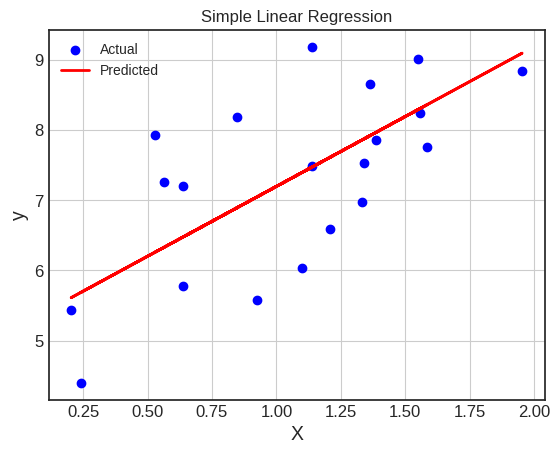

Intercept: 5.21
Coefficient: 1.99


In [26]:
# Simple Linear Regression using scikit-learn

# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 2: Create sample data
# Let's create a simple linear dataset: y = 2x + 5 + noise
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1)

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")


## Example 02
📊 Key Additions in This Version:
    Uses realistic synthetic regression data
    Includes evaluation metrics (MSE, R²)
    Adds residual analysis
    Visualizations are enhanced with seaborn


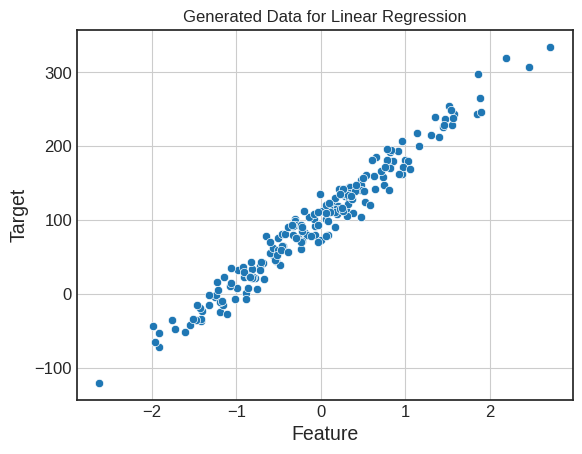

Intercept: 101.83
Coefficient: 86.82
Mean Squared Error: 246.12
R² Score: 0.97


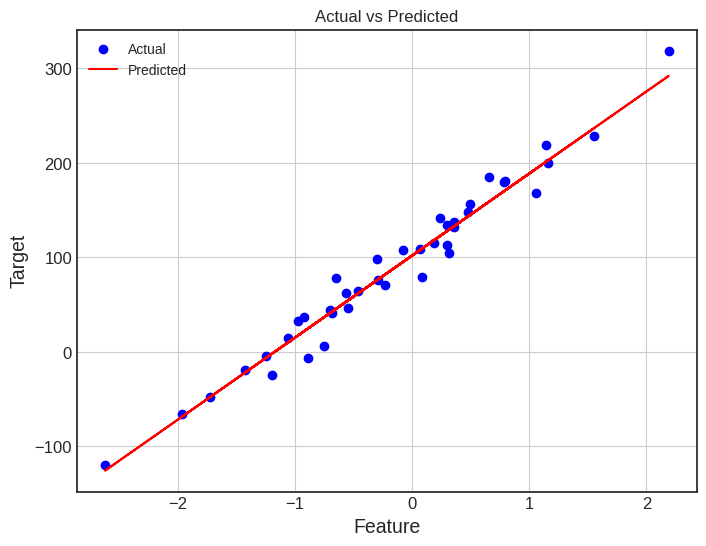

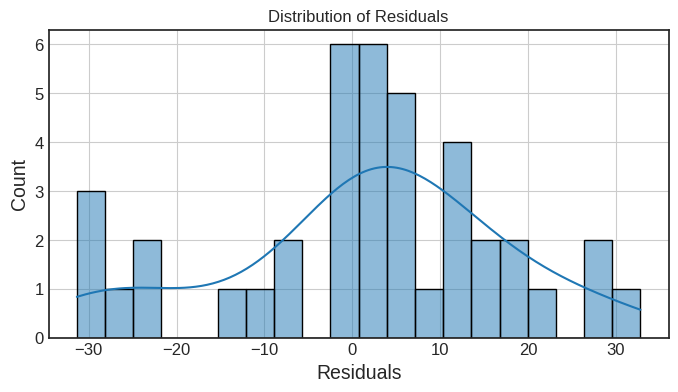

In [28]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 2: Generate synthetic dataset with noise
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
y = y + 100  # Add intercept-like value for realism

# Convert to DataFrame for easier handling
df = pd.DataFrame({'Feature': X.flatten(), 'Target': y})

# Step 3: Visualize the data
sns.scatterplot(x='Feature', y='Target', data=df)
plt.title("Generated Data for Linear Regression")
plt.grid(True)
plt.show()

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title("Actual vs Predicted")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()


## Example 3
| Feature         | Benefit                                |
| --------------- | -------------------------------------- |
| Real-world Data | Uses real housing data from California |
| Evaluation      | Includes MSE and R² metrics            |
| Residuals       | Examines prediction errors for bias    |
| Single Feature  | Good for learning simple regression    |


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


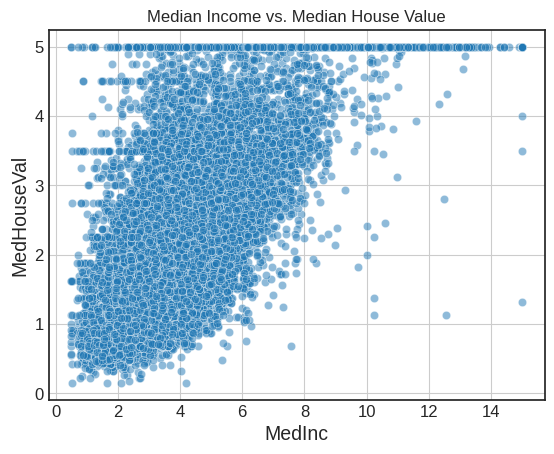

Intercept: 0.4446
Coefficient for MedInc: 0.4193
Mean Squared Error: 0.7091
R² Score: 0.4589


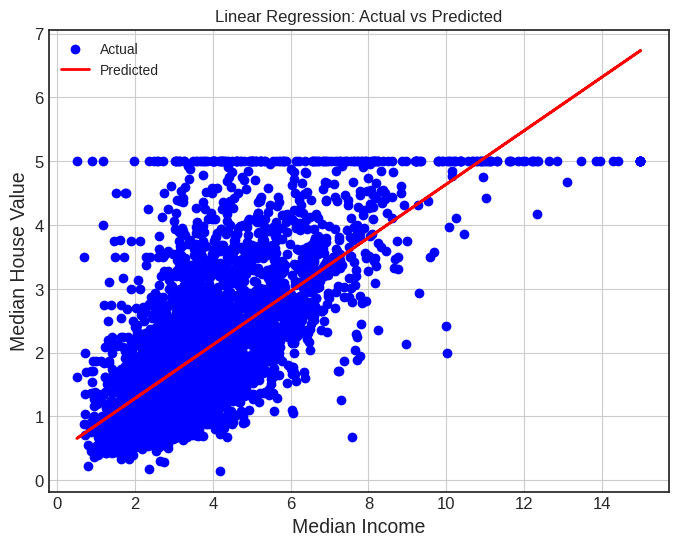

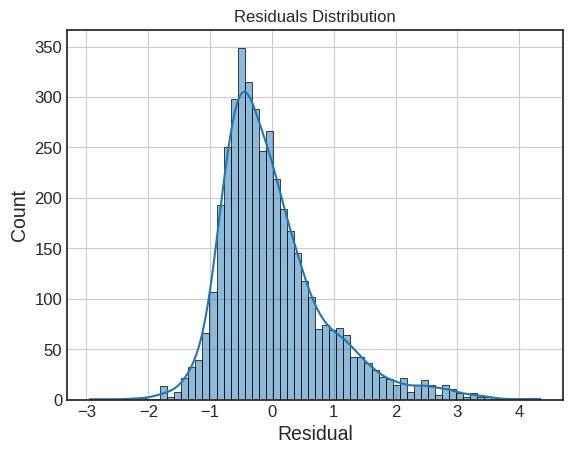

In [30]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load California Housing data
california = fetch_california_housing(as_frame=True)
df = california.frame

# Display first few rows
print(df.head())

# Step 3: Select one feature (e.g., 'MedInc' - median income)
X = df[['MedInc']]  # feature
y = df['MedHouseVal']  # target

# Step 4: Visualize the relationship
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.grid(True)
plt.show()

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient for MedInc: {model.coef_[0]:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 9: Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.grid(True)
plt.show()


## Example 04 

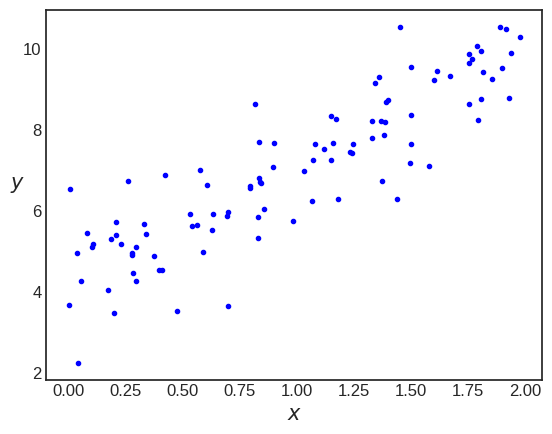

In [31]:
np.random.seed(seed=1)
x = 2 * np.random.rand(100)
y = 4 + 3 * x + np.random.randn(100)
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.show()

Here, we use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def plot_prediction(model, x, y):
    xfit = np.linspace(0, 2, 100)
    yfit = model.predict(xfit[:, np.newaxis])
    plt.plot(x, y, "b.")
    plt.plot(xfit, yfit, "r-", linewidth=1, label="Predictions");
    plt.legend(loc="upper left", fontsize=10)
    plt.xlabel("$x$", fontsize=15)
    plt.ylabel("$y$", rotation=0, fontsize=15)
    y_pred = model.predict(x)
    print("Model slope: ", model.coef_[0])
    print("Model intercept:", model.intercept_)
    print("MAE: ", mean_absolute_error(y, y_pred))
    print("MSE: ", mean_squared_error(y, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y, y_pred)))
    print('R2: ', r2_score(y, y_pred))
    print("CV: ", cross_val_score(
        estimator=model, X=x, 
        y=y, cv=3, scoring ='r2').mean())

Model slope:  2.8424625438276605
Model intercept: 4.2369572541489084
MAE:  0.6819138853655359
MSE:  0.7997618656011584
RMSE:  0.8942940599160649
R2:  0.7778975321559937
CV:  0.7418391145875353


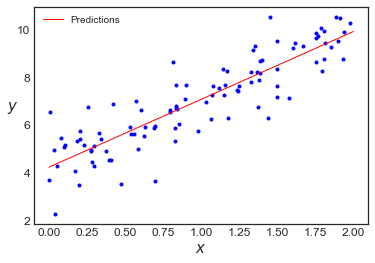

In [9]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x[:, np.newaxis], y)
plot_prediction(lr,x[:, np.newaxis],y)

Here, we are experimenting the linear regression with Stochastic Gradient Descent (SDG) with the dataset

In [17]:
np.random.seed(seed=1)
x = 10 * np.random.rand(100,3)
y = 0.5 + np.dot(x, [1.5, -2., 1.])
lr = LinearRegression(fit_intercept=True)
lr.fit(x, y)
y_pred= lr.predict(x)
print("Model slope: ", lr.coef_)
print("Model intercept:", lr.intercept_)
print("MAE: ", mean_absolute_error(y, y_pred))
print("MSE: ", mean_squared_error(y, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y, y_pred)))
print('R2: ', r2_score(y, y_pred))
print("CV: ", cross_val_score(
    estimator=lr, X=x, y=y, cv=3, 
    scoring ='r2').mean())

Model slope:  [ 1.5 -2.   1. ]
Model intercept: 0.5000000000000109
MAE:  3.882449917114172e-15
MSE:  2.1285562634642393e-29
RMSE:  4.613627925466291e-15
R2:  1.0
CV:  1.0


In [20]:
# Allocate 412 samples for training set 
# and 30 samples for test set
num_test = 30
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (412, 10)
y_train shape (412,)
X_test shape (30, 10)
y_test shape (30,)


# Polynomial Regression

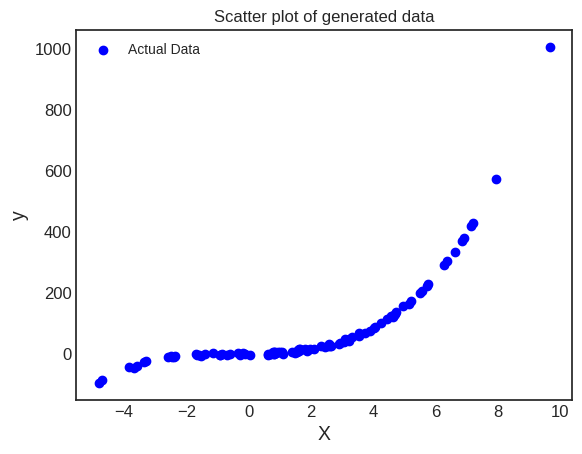

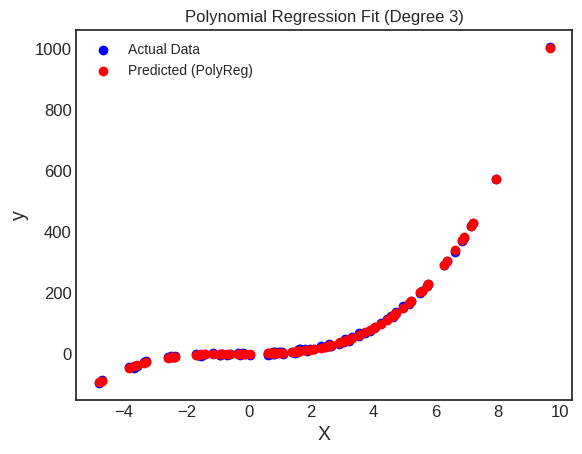

Intercept: [0.65238452]
Coefficients: [[0.         0.94620991 0.96788543 1.00164143]]


In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some sample nonlinear data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X**3 + X**2 + X + 3 + np.random.normal(-3, 3, 100)

X = X[:, np.newaxis]
y = y[:, np.newaxis]

# Visualize the original data
plt.scatter(X, y, color='blue', label="Actual Data")
plt.title("Scatter plot of generated data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Transform features to polynomial features
polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# Plot the Polynomial Regression results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, y_poly_pred, color='red', label='Predicted (PolyReg)')
plt.title("Polynomial Regression Fit (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Setting up a toy dataset

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [37]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

Quick polynomial regression evaluation using Numpy poly1d and polyfit

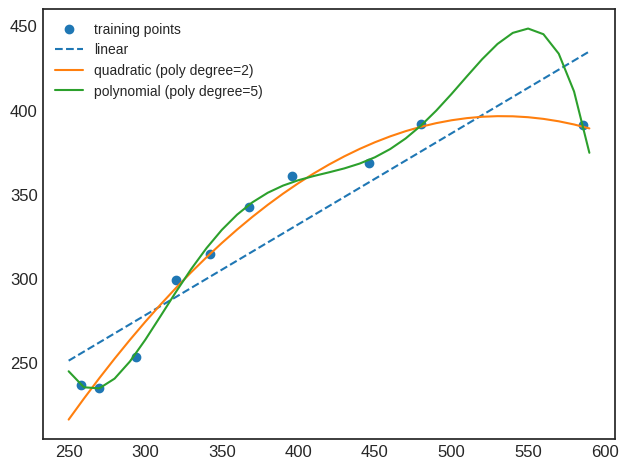

In [38]:
# polynomial regression evaluation using Numpy
xp = np.arange(250, 600, 10)
lr  = np.poly1d(np.polyfit(X.ravel(), y, 1))
pr1 = np.poly1d(np.polyfit(X.ravel(), y, 2))
pr2 = np.poly1d(np.polyfit(X.ravel(), y, 5))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(xp, lr(xp), label='linear', linestyle='--')
plt.plot(xp, pr1(xp), label='quadratic (poly degree=2)')
plt.plot(xp, pr2(xp), label='polynomial (poly degree=5)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
y_lin_pred = lr(X)
y_quad_pred = pr1(X)

print('MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred),
    mean_squared_error(y, y_quad_pred)))
print('RMSE linear: %.3f, quadratic: %.3f' % (
    np.sqrt(mean_squared_error(y, y_lin_pred)),
    np.sqrt(mean_squared_error(y, y_quad_pred))))
print('R2 linear: %.3f, quadratic: %.3f' % (
    r2_score(y, y_lin_pred),
    r2_score(y, y_quad_pred)))

MSE linear: 569.780, quadratic: 61.330
RMSE linear: 23.870, quadratic: 7.831
R2 linear: 0.832, quadratic: 0.982


Polynomial regression modeling using sklean's packages

## High-degree Polynomial Regression

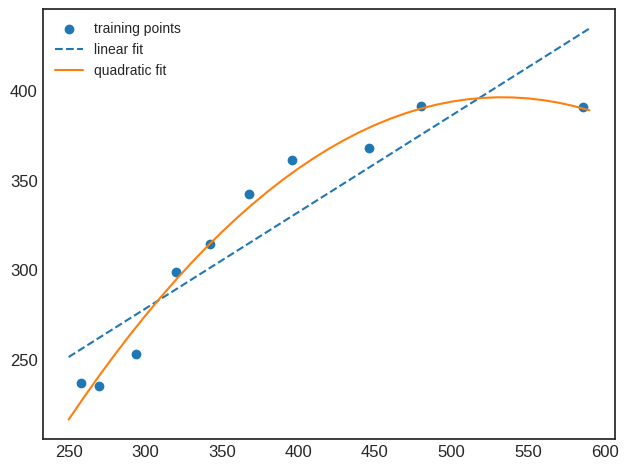

In [40]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

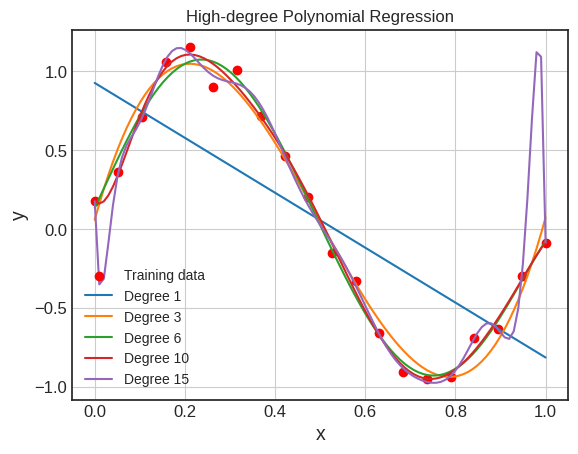

In [46]:
# High-Degree Polynomial Regression Example in Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 1, 20)[:, np.newaxis]
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Plot original data
plt.scatter(X, y, color='red', label='Training data')

# Try different degrees
degrees = [1, 3, 6, 10, 15]

# Plot each model
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f'Degree {degree}')

plt.title('High-degree Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [27]:
X = np.sort(np.random.rand(100))
true_func = lambda X: np.cos(3.5 * np.pi * X)
y = true_func(X) + np.random.randn(100) * 0.1

In [28]:
def plot_polydegree(degrees, X, y):
    plt.figure(figsize=(40, 10))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i+1)
        plt.setp(ax, xticks=(), yticks=())

        linear_regression = LinearRegression()
        polynomial_features = PolynomialFeatures(
        degree=degrees[i], include_bias=False)

        #creating a structure for operation
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)
    
        #Testing
        X_test = np.linspace(0, 1, 100)
        y_pred = pipeline.predict(X_test[:, np.newaxis])
        plt.plot(X_test, y_pred, "r-", label="Model")
        plt.plot(X_test, true_func(X_test), "y-", label="True function")
        plt.scatter(X, y, label="Samples")
        plt.xlabel("x", fontsize=30)
        plt.ylabel("y", fontsize=30)
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best", fontsize=25)
        RMSE=np.sqrt(mean_squared_error(y, pipeline.predict(X[:, np.newaxis])))
        R2=r2_score(y, pipeline.predict(X[:, np.newaxis]))
        plt.title("Degree = {degree} \n [RMSE = {RMSE:.3f}]   [R2 = {R2:.3f}]".format(
            degree=degrees[i],RMSE=RMSE, R2=R2), fontsize=25)
    plt.show()

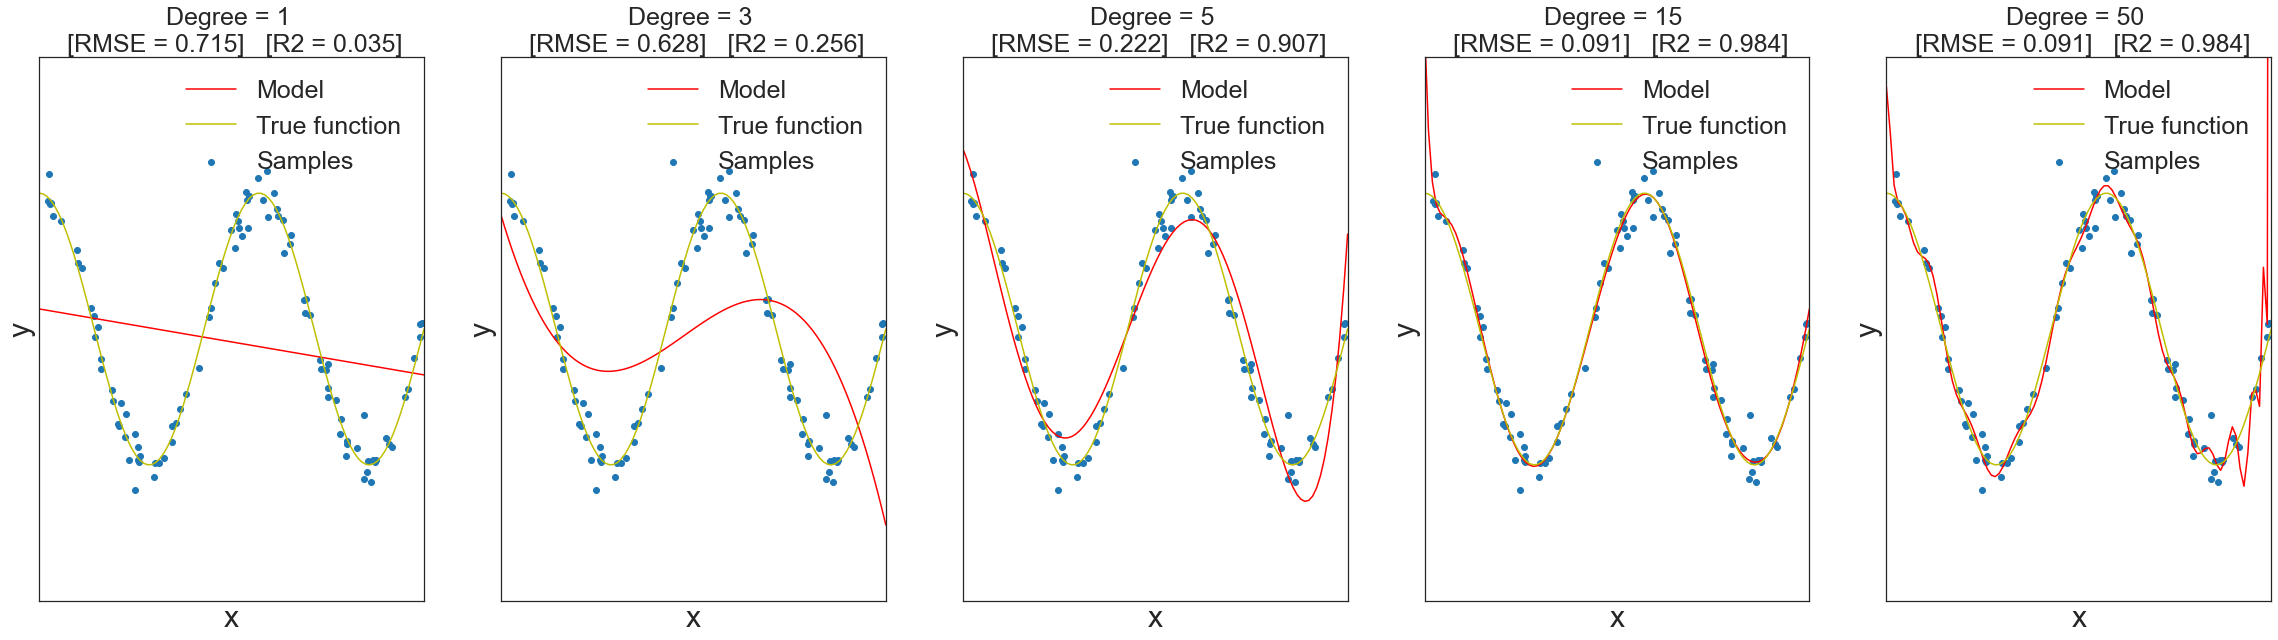

In [29]:
degrees=[1, 3, 5, 15, 50]
plot_polydegree(degrees, X, y)

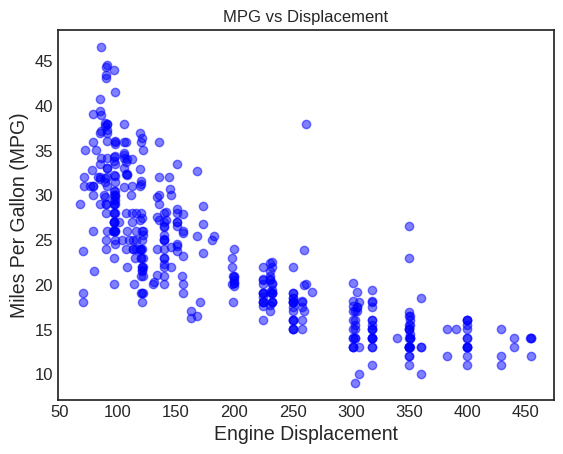

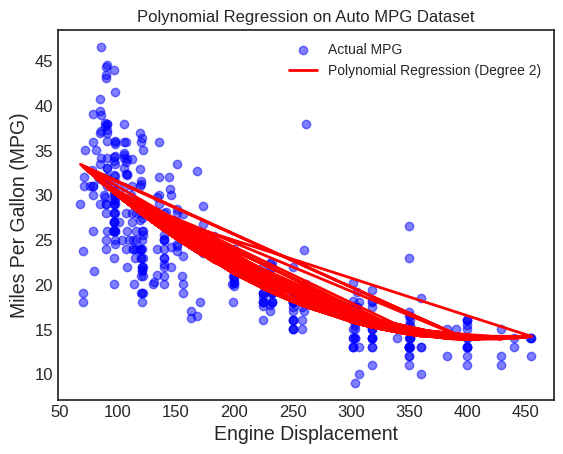

Mean Squared Error: 18.908833542575938
R^2 Score: 0.688808733323848


In [45]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load real-world dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url)

# Drop missing values
data = data.dropna()

# Select feature (engine displacement) and target (mpg)
X = data['displacement'].values.reshape(-1, 1)
y = data['mpg'].values.reshape(-1, 1)

# Visualize data
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("MPG vs Displacement")
plt.xlabel("Engine Displacement")
plt.ylabel("Miles Per Gallon (MPG)")
plt.show()

# Fit Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot results
plt.scatter(X, y, color='blue', label='Actual MPG', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Polynomial Regression (Degree 2)', linewidth=2)
plt.title("Polynomial Regression on Auto MPG Dataset")
plt.xlabel("Engine Displacement")
plt.ylabel("Miles Per Gallon (MPG)")
plt.legend()
plt.show()

# Evaluation metrics
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R^2 Score:", r2_score(y, y_pred))


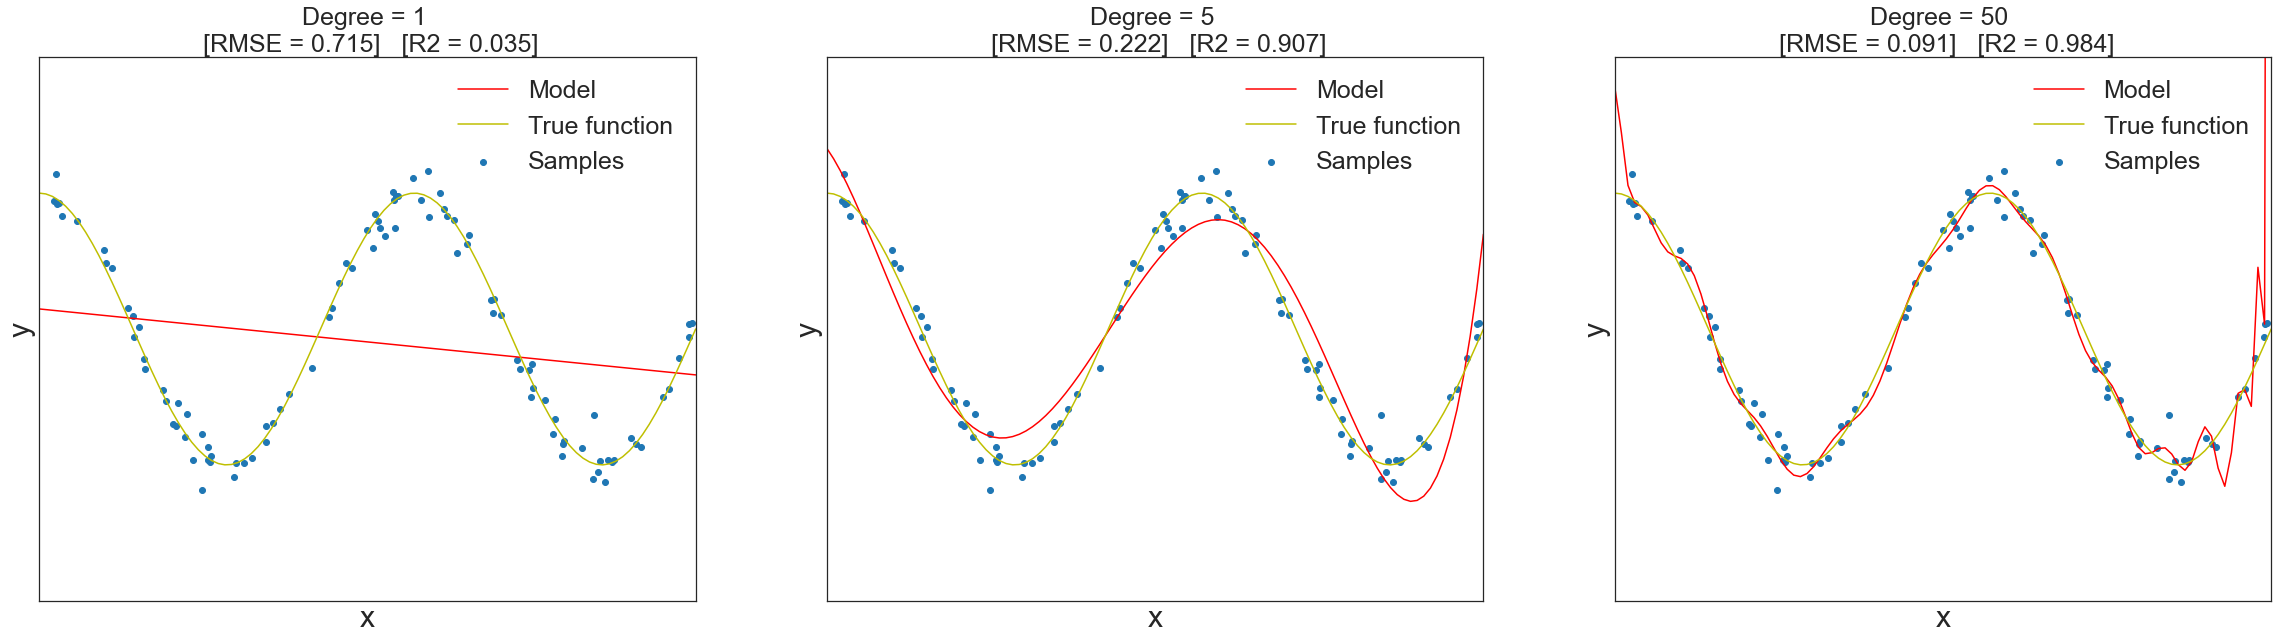

In [30]:
degrees = [1, 5, 50]
plot_polydegree(degrees, X, y)

# Regularized Models

Text(0, 0.5, 'y')

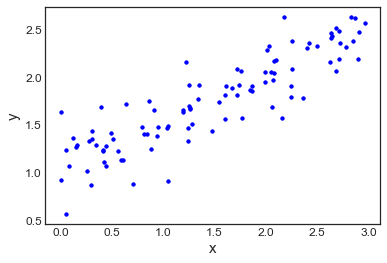

In [31]:
np.random.seed(1)
X = 3 * np.random.rand(100,1)
y = (4 + 2 * X + np.random.randn(100,1))/4
plt.plot(X, y, ".b")
plt.plot(X, y, ".b")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

### Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=1)
ridge_reg.fit(X, y)
print("Ridge slope =", ridge_reg.coef_)
print("Ridge intercept =", ridge_reg.intercept_)
print("Predict y when x=1.5:", ridge_reg.predict([[1.5]]))

Ridge slope = [[0.46774738]]
Ridge intercept = [1.06797983]
Predict y when x=1.5: [[1.76960091]]


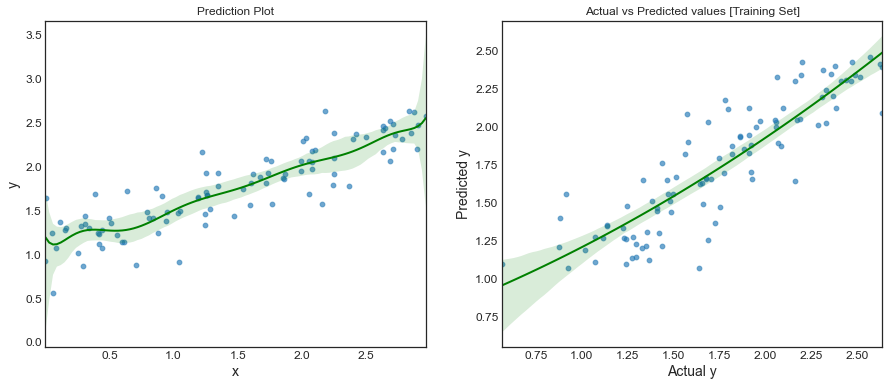

In [33]:
import seaborn as sns
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(X.ravel(), y.ravel(), alpha=0.4)
sns.regplot(X.ravel(), y.ravel(), scatter_kws={'s': 20, 'alpha':0.4}, 
            line_kws={'color':'green', 'linewidth': 2}, order=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction Plot")
plt.subplot(122)
sns.scatterplot(y.ravel(), ridge_reg.predict(X).ravel(), alpha=0.4)
sns.regplot(y.ravel(), ridge_reg.predict(X).ravel(), 
            scatter_kws={'s': 20, 'alpha':0.4}, 
            line_kws={'color':'green', 'linewidth': 2}, order=2)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted values [Training Set]")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, X, y, polynomial, alphas, l1_ratio, **model_kargs):
    for alpha, style in zip(alphas, ("y-", "g--", "r:", "m+")):
        if l1_ratio==None:
            model = model_class(alpha, **model_kargs
                               ) if alpha > 0 else LinearRegression()
        else:
            model = model_class(alpha, l1_ratio=l1_ratio, **model_kargs
                               ) if alpha > 0 else LinearRegression()
        print(model)
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),])
        model.fit(X, y)
        X_new = np.linspace(0, 3, 100).reshape(100, 1)
        y_pred = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        RMSE=np.sqrt(mean_squared_error(y, model.predict(X)))
        R2=r2_score(y, model.predict(X))
        plt.plot(X_new, y_pred, style, linewidth=lw, 
                 label=r"$\alpha={} [RMSE={:.3f}]  [R2={:.3f}]$".format(alpha, RMSE, R2))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=10)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.xlabel("$x$", fontsize=18)
    plt.axis([0, 3, 0, 4])

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_model(Ridge, X, y, polynomial=False, alphas=(0, 10, 100, 10000), l1_ratio=None, random_state=1)
plt.title("Ridge Linear Regression")
plt.subplot(122)
plot_model(Ridge, X, y, polynomial=True, alphas=(0, 10, 100, 10000), l1_ratio=None, random_state=1)
plt.title("Ridge Polynomial Regression (degree=10)")
plt.show()

### Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1, random_state=1)
lasso_reg.fit(X, y)
print("Lasso slope =", lasso_reg.coef_[0])
print("Lasso intercept =", lasso_reg.intercept_)
print("Predict y when x=1.5:", lasso_reg.predict([[1.5]]))

Lasso slope = 0.34554692878998994
Lasso intercept = [1.24610334]
Predict y when x=1.5: [1.76442373]


In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(X.ravel(), y.ravel(), alpha=0.4)
sns.regplot(X.ravel(), y.ravel(), scatter_kws={'s': 20, 'alpha':0.4}, 
            line_kws={'color':'green', 'linewidth': 2}, order=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction Plot")
plt.subplot(122)
sns.scatterplot(true_value.ravel(), predicted_value.ravel(), alpha=0.4)
sns.regplot(true_value.ravel(), predicted_value.ravel(), 
            scatter_kws={'s': 20, 'alpha':0.4}, 
            line_kws={'color':'green', 'linewidth': 2}, order=2)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted values [Training Set]")
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_model(Lasso, X, y, polynomial=False, alphas=(0, 0.01, 0.1, 1), l1_ratio=None, random_state=1)
plt.title("Lasso Linear Regression")
plt.subplot(122)
plot_model(Lasso, X, y, polynomial=True, alphas=(0, 0.01, 0.1, 1), l1_ratio=None, random_state=1)
plt.title("Lasso Polynomial Regression (degree=10)")
plt.show()

### ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=1)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])
print("ElasticNet slope =", elastic_net.coef_[0])
print("ElasticNet intercept =", elastic_net.intercept_)
print("Predict y when x=1.5:", elastic_net.predict([[1.5]]))

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_model(ElasticNet, X, y, polynomial=False, alphas=(0, 0.01, 0.1, 1), l1_ratio=0.5, random_state=1)
plt.title("ElasticNet Linear Regression")
plt.subplot(122)
plot_model(ElasticNet, X, y, polynomial=True, alphas=(0, 0.01, 0.1, 1), l1_ratio=0.5, random_state=1)
plt.title("ElasticNet Polynomial Regression (degree=10)")
plt.show()

###  Coefficients vs Alpha of Ridge and Lasso Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_) 

# #############################################################################
# Display results
plt.figure(figsize=(10, 5))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

###  Coefficients vs Alpha of  Lasso and ElasticNet Regression

In [ ]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X /= X.std(axis=0)  # Standardize data 
                    # (easier to set the l1_ratio parameter)
# Compute paths
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True)

# Display results
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)
plt.xlabel("-Log(alpha)")
plt.ylabel("Coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")

plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)
plt.xlabel("-Log(alpha)")
plt.ylabel("Coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")

plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)
plt.xlabel("-Log(alpha)")
plt.ylabel("Coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

### Cross-validation: evaluating estimator performance

#### Lasso regression cross-validation

In [ ]:
# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

In [ ]:
np.random.seed(1)
X = 3 * np.random.rand(100,1)
y = (4 + 2 * X + np.random.randn(100,1))/4
plt.plot(X, y, ".b")
plt.plot(X, y, ".b")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

In [ ]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': np.arange(-20,100,0.25)}
# Cross validation of Ridge regression with 5 folds
ridge_cv = GridSearchCV(estimator=Ridge(),
                       param_grid=params,
                       scoring='r2',
                       cv=5,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
ridge_cv.fit(X, y)

In [ ]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results.head()

In [ ]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

In [ ]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

#### Lasso regression cross-validation

In [ ]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': np.arange(0,5,0.01)}
# Cross validation of Lasso regression with 5 folds
lasso_cv = GridSearchCV(estimator=Lasso(),
                       param_grid=params,
                       scoring='r2',
                       cv=5,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
lasso_cv.fit(X, y)
# creating dataframe with lasso results
lasso_results = pd.DataFrame(lasso_cv.cv_results_)
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

#### Experiment different cross-validation methods

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
df = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/card.dta')
df = df.fillna(df.median())
df

In [ ]:
X = ['married', 'exper', 'expersq',
     'nearc2', 'nearc4', 'fatheduc', 'motheduc',
     'weight', 'momdad14', 'sinmom14', 'step14', 
     'reg661', 'reg662', 'reg663', 'reg664', 
     'reg665', 'reg666', 'reg667', 'reg668',
     'south66', 'black', 'smsa', 'south', 'smsa66']
Y = ['educ']

In [ ]:
def r2(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(data[X], 
                                                                data[Y], 
                                                                test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
        
    return pd.DataFrame(results)

In [ ]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
r2(models, df)

In [ ]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params
                                ).fit(df[X], df[Y]).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params
                                ).fit(df[X], df[Y]).best_estimator_,}
r2(models2, df)

In [ ]:
lasso_params = {'fit__alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'fit__alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])

models3 = {'OLS': pipe1,
           'Lasso': GridSearchCV(pipe2, 
                                 param_grid=lasso_params
                                ).fit(df[X], df[Y]).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, 
                                 param_grid=ridge_params
                                ).fit(df[X], df[Y]).best_estimator_,}
r2(models3, df)

# Consolidation / self-evaluation exercises

Explore the following toy dataset

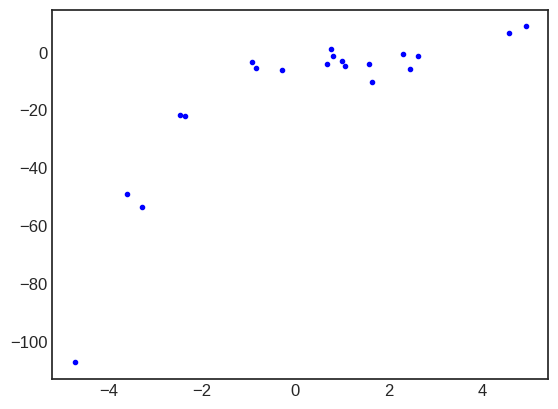

In [48]:
def generate_data_set():
    np.random.seed(0)
    data_size = 20
    x = 2 - 3 * np.random.normal(0, 1, data_size)
    y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, data_size)

    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    return x, y

x_train, y_train = generate_data_set()
plt.plot(x_train, y_train, "b.")

Use the knowledge and skills gained from this workshop, try to build linear and polynomial regression (with different polynomial degree) models for the toy dataset, and plot the outcomes matching the images shown below.
Suggest which linear model is underfitting, correct fitting and overfitting.
![image](regression-fitting1.png)
![image](regression-fitting2.png)

# End of Workshop